# Programming Project 1 analysis using EDA tools

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset and save it to a dataframe named 'df'
df=pd.read_csv('HLG_Timesheet_Project.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   initials   38 non-null     object
 1   date       38 non-null     object
 2   course_id  38 non-null     object
 3   time(m)    38 non-null     int64 
 4   summary    38 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


### Investigate your dataset using pandas modules and do the tasks. At the end the dataframe will be look like: 
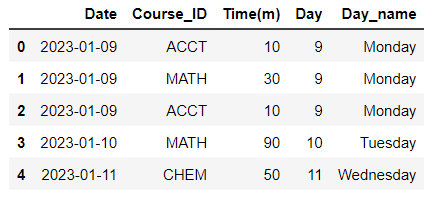

In [3]:
df.columns

Index(['initials', 'date', 'course_id', 'time(m)', 'summary'], dtype='object')

In [4]:
# Is there any column you want to drop? If yes which column and why?

# Yes. The initials and the summary column should be dropped. The initials column should be dropped because 
#all of the data is the same so it is not relevant. The smmary column should be dropped because that information is 
# not relevatn to this dataframe.

In [5]:
df.drop(['initials', 'summary'], axis=1, inplace=True)
df.head()

,date,course_id,time(m)
0,1/6/23,DS-160,10
1,1/8/23,MKTG-305,40
2,1/9/23,CHEM-109,15
3,1/12/23,CHEM-109,60
4,1/12/23,CHEM-109,100


In [6]:
# Convert the date column to datetime

df['date']=pd.to_datetime(df['date'])
df.head()

,date,course_id,time(m)
0,2023-01-06,DS-160,10
1,2023-01-08,MKTG-305,40
2,2023-01-09,CHEM-109,15
3,2023-01-12,CHEM-109,60
4,2023-01-12,CHEM-109,100


In [7]:
# Calculate the day of the month and create a new column named 'Day'
df['Day']=df['date'].dt.day
df.head()

,date,course_id,time(m),Day
0,2023-01-06,DS-160,10,6
1,2023-01-08,MKTG-305,40,8
2,2023-01-09,CHEM-109,15,9
3,2023-01-12,CHEM-109,60,12
4,2023-01-12,CHEM-109,100,12


In [8]:
# Create a new column called Day_name using  .dt.day_name()
df['Day_name']=df['date'].dt.day_name()
df.head()

,date,course_id,time(m),Day,Day_name
0,2023-01-06,DS-160,10,6,Friday
1,2023-01-08,MKTG-305,40,8,Sunday
2,2023-01-09,CHEM-109,15,9,Monday
3,2023-01-12,CHEM-109,60,12,Thursday
4,2023-01-12,CHEM-109,100,12,Thursday


### Answer the questions

In [22]:
# What is the average time you have spend for learning?

print('Average Time Spent:', np.round(np.mean(np.array(df['time(m)']))))

# The average time I have spent learning is 25 minutes per day

Average Time Spent: 25.0


In [23]:
# Display all of the entries where you have spent more than the average time to learn 
df.loc[(df['time(m)']>25)]

,date,course_id,time(m),Day,Day_name
1,2023-01-08,MKTG-305,40,8,Sunday
3,2023-01-12,CHEM-109,60,12,Thursday
4,2023-01-12,CHEM-109,100,12,Thursday
16,2023-01-23,CHEM-109,60,23,Monday
17,2023-01-24,DS-160,30,24,Tuesday
18,2023-01-25,CHEM-109,60,25,Wednesday
24,2023-02-01,BUSA-245,30,1,Wednesday
25,2023-02-02,CHEM-109,30,2,Thursday
29,2023-02-07,CHEM-109,28,7,Tuesday
34,2023-02-11,CHEM-109,70,11,Saturday


In [51]:
# Which course you have spent the maximum time to prepare?
courses=df['course_id'].value_counts()
print(courses)

# I spent the most time doing CHEM-109

CHEM-109    13
MKTG-305     9
DS-160       7
BUSA-245     7
BUSA-301     2
Name: course_id, dtype: int64


In [52]:
print('Max Time Spent:', np.max(np.array(df['time(m)'])))

Max Time Spent: 100


In [12]:
# Which day of the week you sepent most of the time?
# I spent the most time doing work on Wednesday

### Investigate the distribution of Time, adding the mean. How the data distributed?
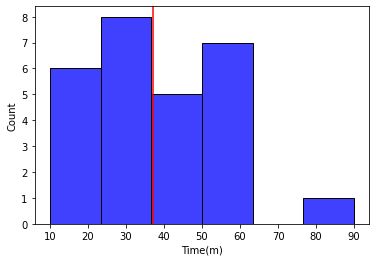

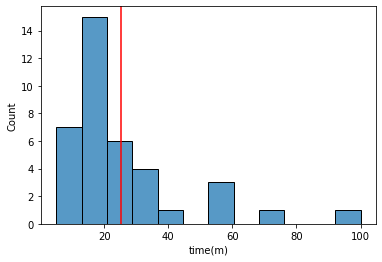

In [27]:
hist_plot=sns.histplot(x='time(m)', 
                      data=df)

mean=df['time(m)'].mean()


plt.axvline(mean, color='red')
plt.show()

In [ ]:
# the data distribution is right skewed

### Investigate Total time by Day using bar plot - Remove the Confidence Interval - By Course ID. Comment on your findings
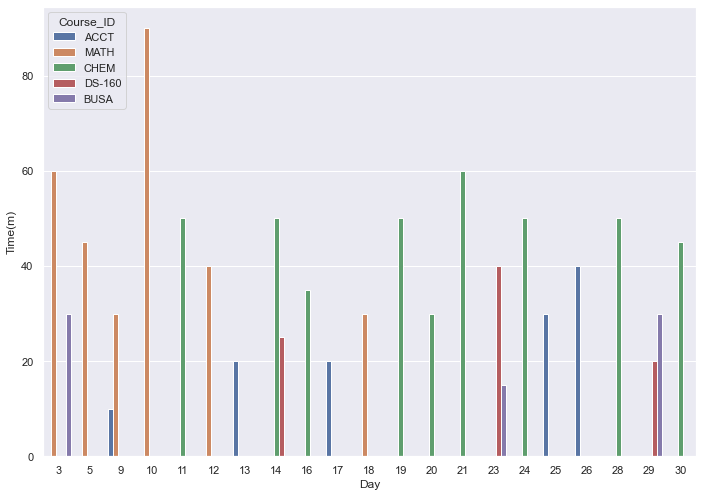

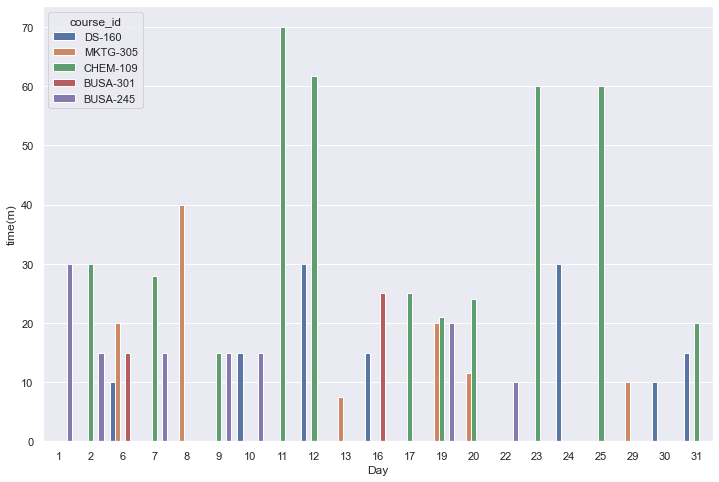

In [34]:
sns.set(rc={'figure.figsize':(12,8)})
bar_plot=sns.barplot(x='Day', y='time(m)', data=df, ci=False, hue='course_id')

### Investigate the measure of dispersion (table and plot) of time column.
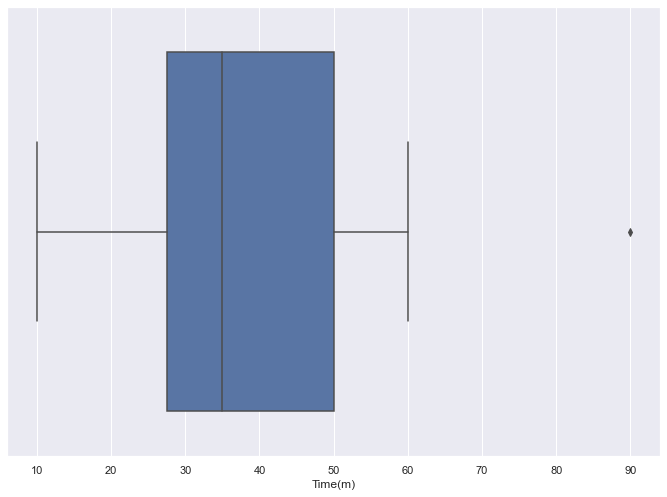

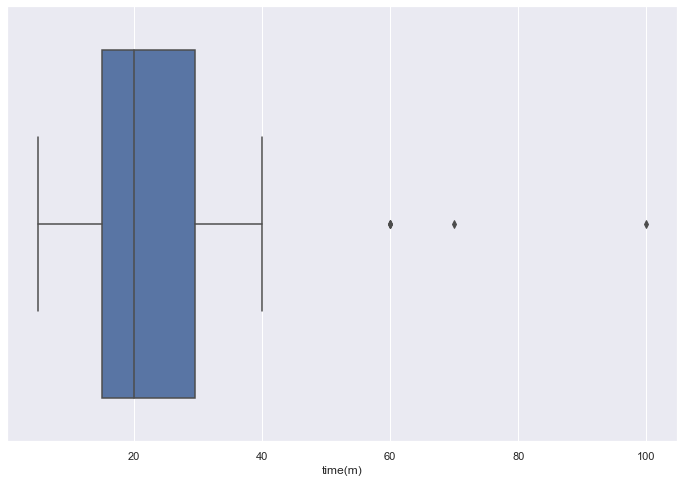

In [35]:
box_plot=sns.boxplot(x='time(m)', 
                    data=df)

### Investigate the the distribution of time by Day_name
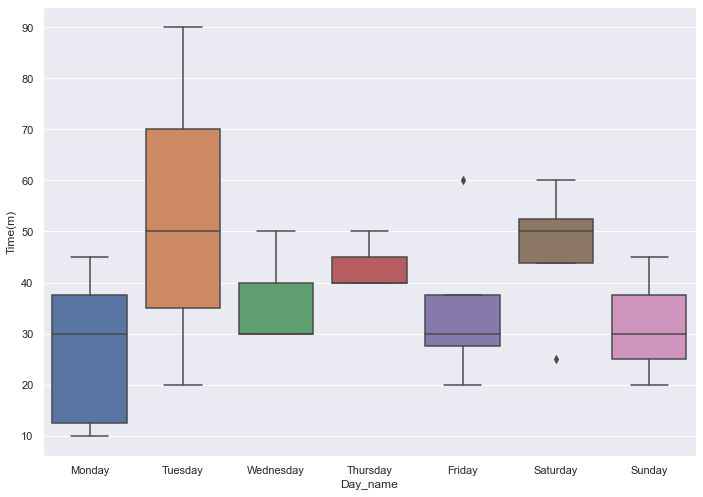

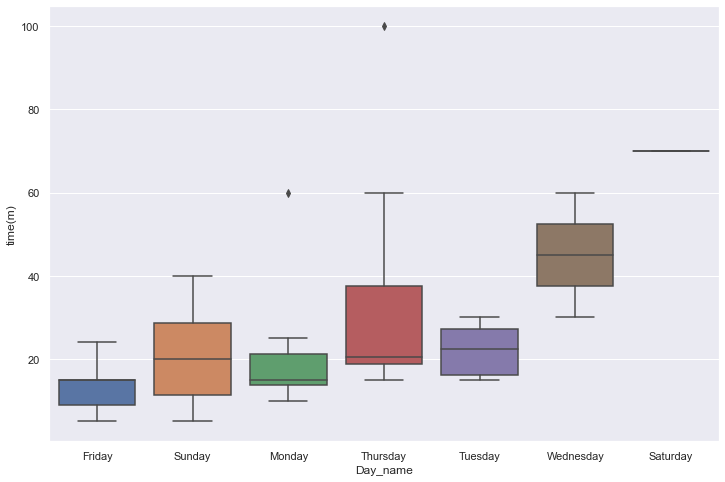

In [37]:
box_plot=sns.boxplot(x='Day_name',
                    y='time(m)',
                    data=df)

### Use lmplots to plot Day and Time , remove error bar, add hue and display by column
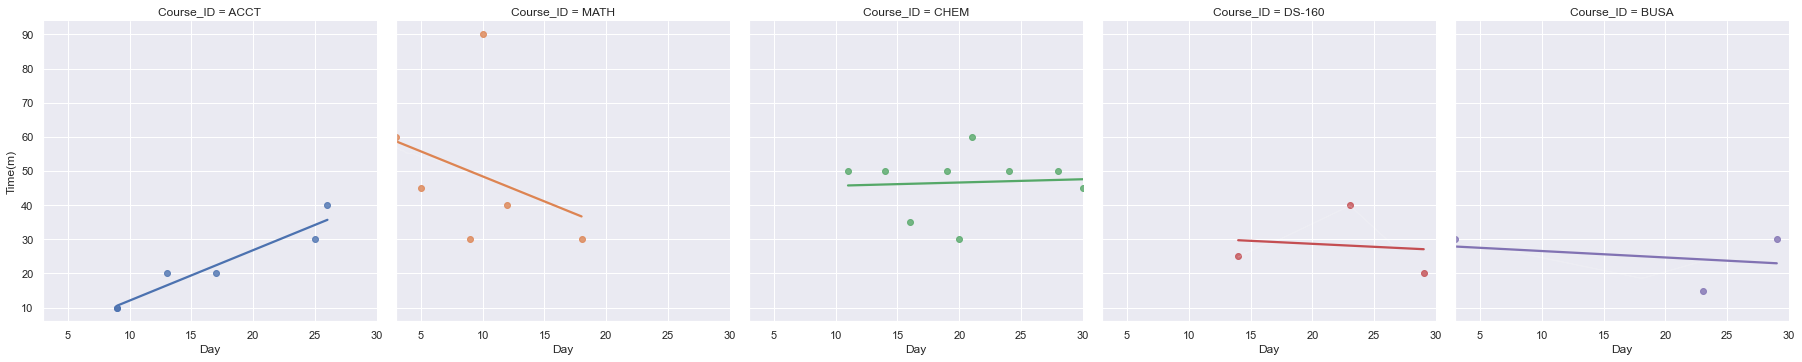

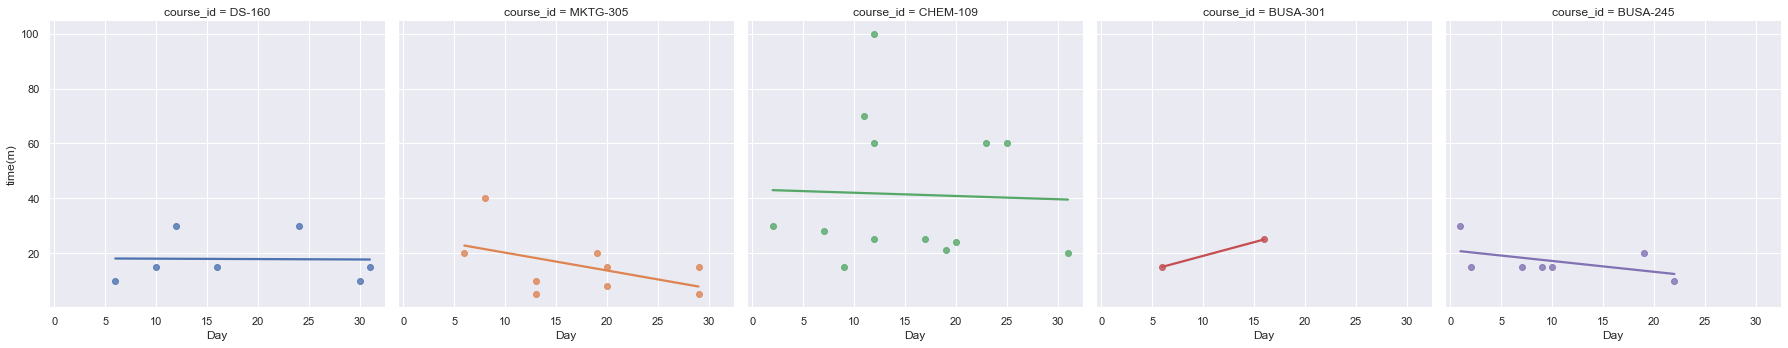

In [42]:
lm_plot=sns.lmplot(x='Day',
                  y='time(m)',
                  data=df,
                  hue='course_id',
                  ci=False,
                  col='course_id',
                  height=5)

### Create a pair plot of Day and Time and add course id as hue
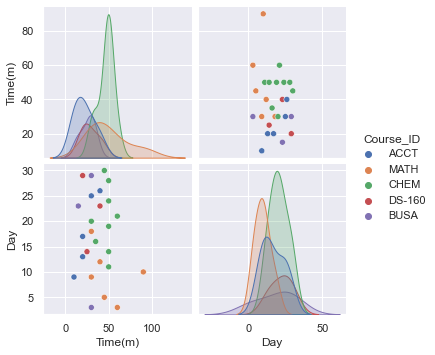

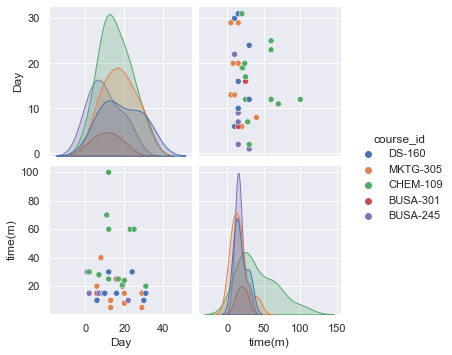

In [46]:
pair_plot=sns.pairplot(df[['Day','time(m)','course_id']], hue='course_id')

### Display the Heatmap and comment on your findings
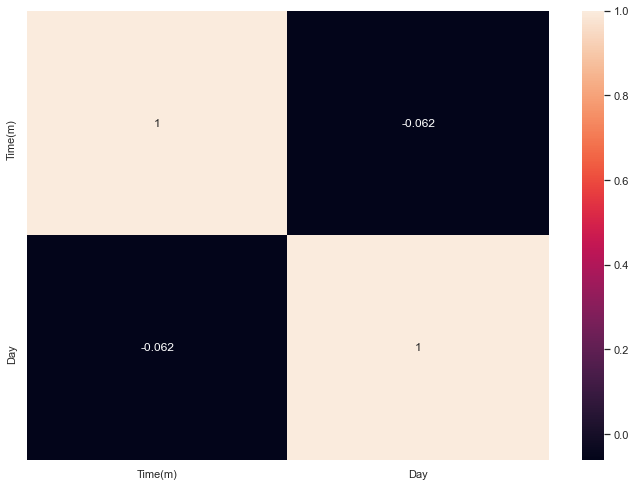

             Day  time(m)
Day      1.00000 -0.08583
time(m) -0.08583  1.00000


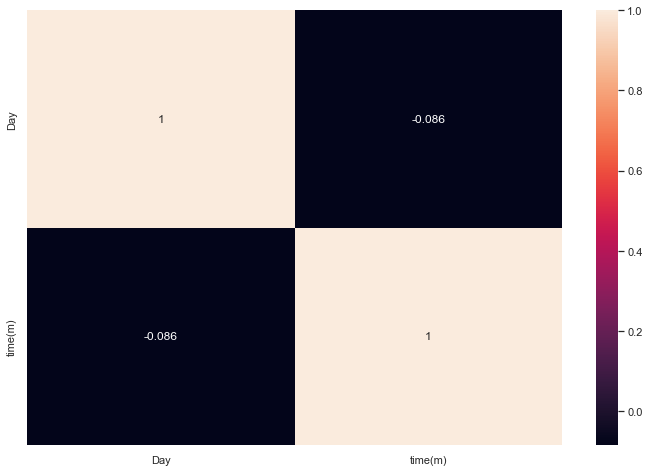

In [49]:
heat_map_corr=df[['Day','time(m)']].corr(method='pearson')
print(heat_map_corr)
cols=['Day','time(m)']

heat_map=sns.heatmap(heat_map_corr, annot=True,
                    xticklabels=cols,
                    yticklabels=cols)

In [ ]:
# I notice that the correlation between day and time is very weak